# <center> CCT College Dublin </center>

## <center> Assessment Cover Page</center>


<br><br><br>
---

<span style="font-size:larger;">

**Module Title:**&nbsp;&nbsp;&nbsp; Diploma in Predictive Analytics
	
**Assessment Title:**&nbsp;&nbsp;&nbsp;PDA FINAL PROJECT
	
**Lecturer Name:**&nbsp;&nbsp;&nbsp; Marina Iantorno
	
**Student Full Name:**&nbsp;&nbsp;&nbsp;Yumiko Maria Bejarano Azogue 
	
**Student Number:**&nbsp;&nbsp;&nbsp; 2024144
	
**Assessment Due Date:**&nbsp;&nbsp;&nbsp; 08/07/2024
	
**Date of Submission:**&nbsp;&nbsp;&nbsp; 14/08/2024
    
</span> 

<br><br><br>

---

#### Declaration 

```
By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.
```
<br><br><br>

--- 

In [7]:
#Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

import warnings

warnings.filterwarnings('ignore')


In [2]:
# Load the data from a CSV file
data = pd.read_csv('OnlineNewsPopularity.csv', nrows = 10000)

## 1. Exploratory Data Analysis (EDA)

In [3]:
# Display the first few rows of the dataframe
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
# Information about the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             10000 non-null  object 
 1    timedelta                      10000 non-null  float64
 2    n_tokens_title                 10000 non-null  float64
 3    n_tokens_content               10000 non-null  float64
 4    n_unique_tokens                10000 non-null  float64
 5    n_non_stop_words               10000 non-null  float64
 6    n_non_stop_unique_tokens       10000 non-null  float64
 7    num_hrefs                      10000 non-null  float64
 8    num_self_hrefs                 10000 non-null  float64
 9    num_imgs                       10000 non-null  float64
 10   num_videos                     10000 non-null  float64
 11   average_token_length           10000 non-null  float64
 12   num_keywords                   1

In [12]:
def info_to_dataframe(data):
    buffer = io.StringIO()
    data.info(buf=buffer)
    info_str = buffer.getvalue().splitlines()

    info_data = []
    for line in info_str[3:-2]:
        split_line = line.split()
        if len(split_line) == 5:
            info_data.append(split_line)
        elif len(split_line) > 5:  
            info_data.append([split_line[0], ' '.join(split_line[1:-3]), split_line[-3], split_line[-2], split_line[-1]])

    info_df = pd.DataFrame(info_data, columns=["#", "Column", "Non-Null Count", "Dtype", "Memory"])
        # Remove the first row
    info_df = info_df.iloc[1:].reset_index(drop=True)
    return info_df


In [15]:
# Convertir la información a un DataFrame
info_df = info_to_dataframe(data)  # Convertir la información a un DataFrame
info_df

,#,Column,Non-Null Count,Dtype,Memory
0,0,url,10000,non-null,object
1,1,timedelta,10000,non-null,float64
2,2,n_tokens_title,10000,non-null,float64
3,3,n_tokens_content,10000,non-null,float64
4,4,n_unique_tokens,10000,non-null,float64
...,...,...,...,...,...
56,56,title_subjectivity,10000,non-null,float64
57,57,title_sentiment_polarity,10000,non-null,float64
58,58,abs_title_subjectivity,10000,non-null,float64
59,59,abs_title_sentiment_polarity,10000,non-null,float64


In [22]:
# Descriptive statistics
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,639.303100,9.761400,486.745500,0.561083,0.992200,0.704208,9.948400,3.319300,3.487600,1.22400,...,0.098664,0.766639,-0.254829,-0.488789,-0.113345,0.271441,0.081693,0.349254,0.151953,3309.536200
std,55.552748,1.966534,409.006459,0.119295,0.087977,0.121718,10.380795,4.408956,7.635226,4.38718,...,0.071210,0.225766,0.126675,0.277650,0.098397,0.323609,0.260780,0.187020,0.227132,14507.654467
min,541.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,4.000000
25%,590.000000,8.000000,223.000000,0.488027,1.000000,0.642668,4.000000,1.000000,0.000000,0.00000,...,0.050000,0.600000,-0.323205,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,973.000000
50%,641.000000,10.000000,358.000000,0.560333,1.000000,0.709779,7.000000,2.000000,1.000000,0.00000,...,0.100000,0.800000,-0.247917,-0.500000,-0.100000,0.100000,0.000000,0.500000,0.000000,1500.000000
75%,688.000000,11.000000,626.000000,0.633943,1.000000,0.777174,12.000000,4.000000,1.000000,1.00000,...,0.100000,1.000000,-0.179284,-0.291667,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,18.000000,4979.000000,1.000000,1.000000,1.000000,171.000000,74.000000,99.000000,75.00000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [24]:
# Check for missing values
data.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [25]:
# Verify column names after cleaning
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [26]:
# Remove leading and trailing spaces from column names
data.columns = data.columns.str.strip()

# Verify column names after cleaning
print(data.columns)

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [27]:
# List of numerical columns
numerical_columns = ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 
                      'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 
                      'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 
                      'num_keywords', 'self_reference_min_shares', 'self_reference_max_shares', 
                      'self_reference_avg_sharess', 'global_subjectivity', 
                      'global_sentiment_polarity', 'global_rate_positive_words', 
                      'global_rate_negative_words', 'rate_positive_words', 
                      'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 
                      'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 
                      'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 
                      'abs_title_subjectivity', 'abs_title_sentiment_polarity']

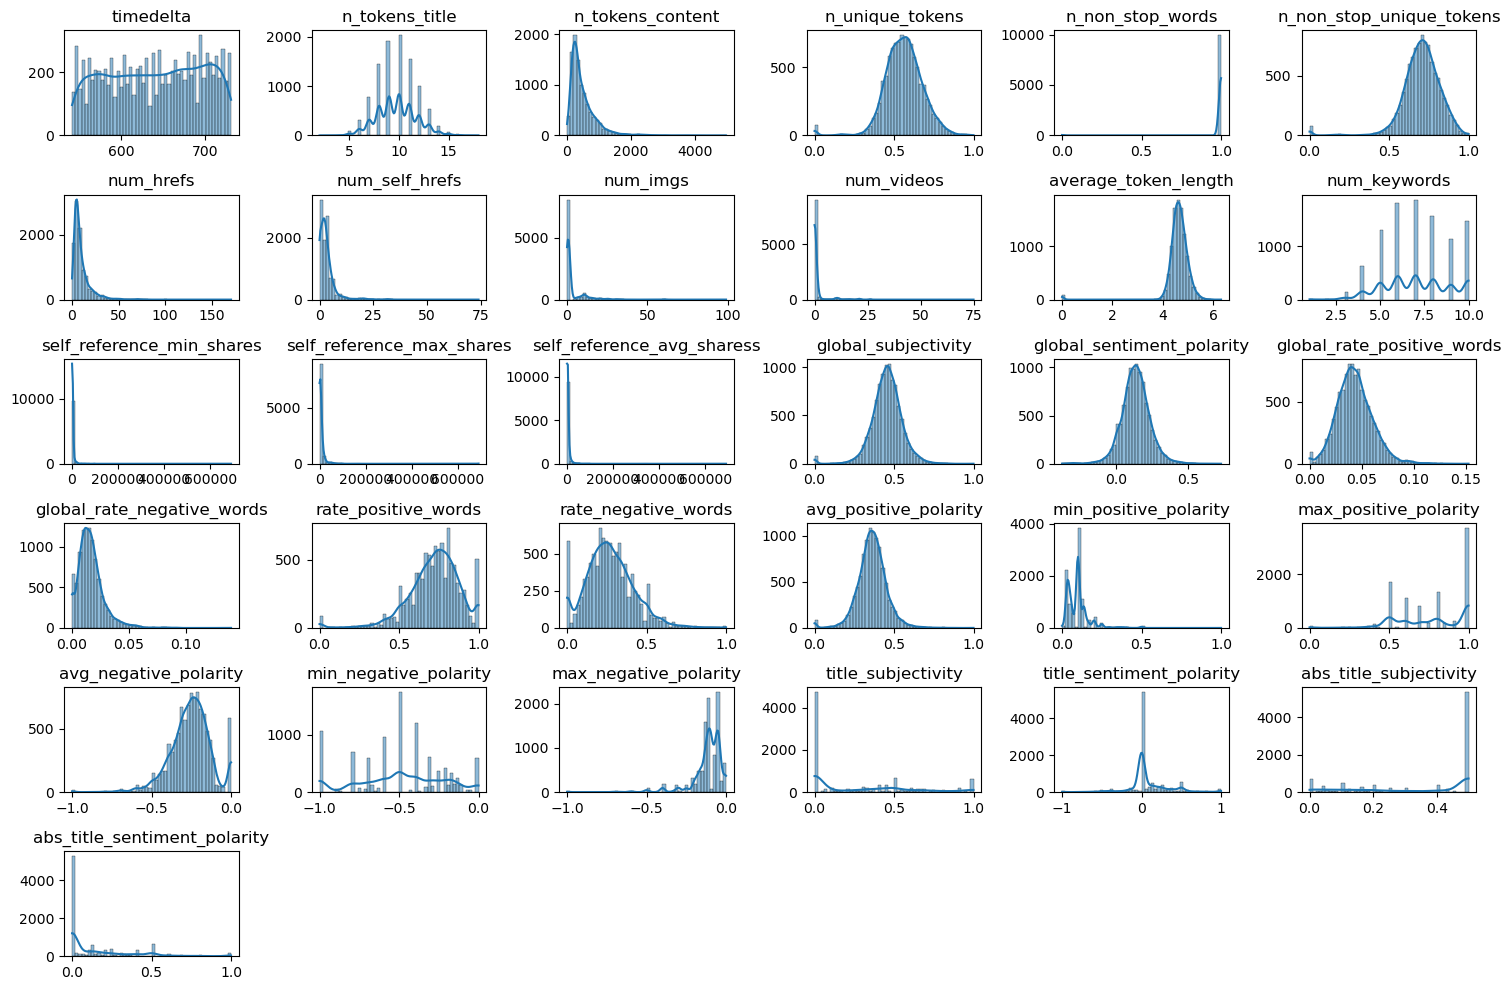

In [28]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(6, 6, i + 1)
    if column in data.columns:  # Check if column exists
        sns.histplot(data[column], kde=True, bins=50)  # Reduce the number of bins *******
        plt.title(column)
        plt.xlabel('')
        plt.ylabel('')
    else:
        plt.title(f'Column {column} not found')
        plt.xlabel('')
        plt.ylabel('')

plt.tight_layout()
plt.show()

## 2. Clustering

In [29]:
#we import libraries for this exercise

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [30]:
#We define the X
X = data.iloc[:, 1:].values  # Excludes the first column

In [31]:
# Define column indices for scaling
# All columns will be scaled since you want to scale all columns
column_indices = list(range(X.shape[1]))

# Create the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), column_indices)  # Apply scaling to all columns
    ]
)

In [32]:
# Apply transformations to the dataset
x_transformed = column_transformer.fit_transform(X)

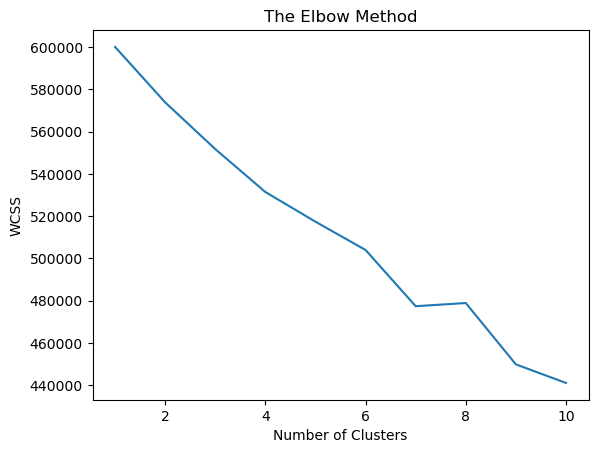

In [33]:
#We conduct the Elbow method to select the best number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    kmeans.fit(x_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
#We create our y
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y = kmeans.fit_predict(x_transformed)

In [35]:
y

array([2, 0, 0, ..., 0, 0, 2])

In [36]:
#Append the y into the dataset
data['Popularity'] = y

In [37]:
data.head(20)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.6000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.1250,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.8000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,0
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.6000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.5000,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.6,-0.195000,-0.4000,-0.100000,0.642857,0.214286,0.142857,0.214286,855,3
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,1.0,-0.224479,-0.5000,-0.050000,0.000000,0.000000,0.500000,0.000000,556,3
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,1.0,-0.242778,-0.5000,-0.050000,1.000000,0.500000,0.500000,0.500000,891,3
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.8,-0.125000,-0.1250,-0.125000,0.125000,0.000000,0.375000,0.000000,3600,3
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.5,-0.238095,-0.5000,-0.100000,0.000000,0.000000,0.500000,0.000000,710,1


In [38]:
#Explore the clusters to see the content inside

cluster_0 = data[data['Popularity'] == 0]
cluster_0.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.700000,-0.118750,-0.125,-0.100000,0.0,0.0,0.5,0.0,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.000000,-0.466667,-0.800,-0.133333,0.0,0.0,0.5,0.0,1500,0
17,http://mashable.com/2013/01/07/entrepreneur-tr...,731.0,8.0,397.0,0.624679,1.0,0.805668,11.0,0.0,1.0,...,1.000000,-0.144643,-0.200,-0.100000,0.0,0.0,0.5,0.0,3100,0
24,http://mashable.com/2013/01/07/htc-q1/,731.0,13.0,244.0,0.560000,1.0,0.680272,3.0,2.0,1.0,...,0.433333,-0.456481,-1.000,-0.125000,0.7,-0.4,0.2,0.4,852,0
29,http://mashable.com/2013/01/07/jobs-contently/,731.0,11.0,723.0,0.490934,1.0,0.642241,18.0,1.0,1.0,...,1.000000,-0.213889,-0.600,-0.100000,0.5,0.5,0.0,0.5,425,0


In [39]:
cluster_1 = data[data['Popularity'] == 1]
cluster_1.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.50,-0.238095,-0.500000,-0.10,0.00,0.00,0.50,0.00,710,1
10,http://mashable.com/2013/01/07/cosmic-events-d...,731.0,9.0,1248.0,0.490050,1.0,0.731638,11.0,0.0,1.0,...,1.00,-0.415064,-1.000000,-0.10,0.00,0.00,0.50,0.00,2200,1
15,http://mashable.com/2013/01/07/earth-size-plan...,731.0,12.0,682.0,0.459542,1.0,0.634961,10.0,0.0,1.0,...,0.60,-0.220150,-0.600000,-0.05,0.75,-0.25,0.25,0.25,1600,1
21,http://mashable.com/2013/01/07/ftc-google-leaks/,731.0,9.0,391.0,0.510256,1.0,0.650000,9.0,2.0,1.0,...,0.35,-0.108333,-0.166667,-0.05,0.00,0.00,0.50,0.00,598,1
23,http://mashable.com/2013/01/07/hillary-clinton...,731.0,11.0,125.0,0.674797,1.0,0.797468,1.0,1.0,1.0,...,0.60,0.000000,0.000000,0.00,0.45,0.40,0.05,0.40,1500,1


In [40]:
cluster_2 = data[data['Popularity'] == 2]
cluster_2.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.6000,-0.200000,0.50,-0.1875,0.00,0.1875,593,2
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.6000,-0.166667,0.00,0.0000,0.50,0.0000,1200,2
12,http://mashable.com/2013/01/07/creature-cups/,731.0,9.0,274.0,0.609195,1.0,0.707602,18.0,2.0,11.0,...,0.7,-0.310417,-0.6000,-0.050000,1.00,-1.0000,0.50,1.0000,823,2
13,http://mashable.com/2013/01/07/dad-jokes/,731.0,9.0,285.0,0.744186,1.0,0.841530,4.0,2.0,0.0,...,1.0,-0.337889,-0.7000,-0.100000,1.00,-1.0000,0.50,1.0000,10000,2
14,http://mashable.com/2013/01/07/downton-abbey-t...,731.0,8.0,259.0,0.562753,1.0,0.644444,19.0,3.0,9.0,...,0.5,-0.138690,-0.1875,-0.050000,0.75,0.5500,0.25,0.5500,761,2


In [48]:
cluster_3 = data[data['Popularity'] == 3]
cluster_3.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050,0.454545,0.136364,0.045455,0.136364,505,3
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.6,-0.195000,-0.400,-0.100,0.642857,0.214286,0.142857,0.214286,855,3
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,1.0,-0.224479,-0.500,-0.050,0.000000,0.000000,0.500000,0.000000,556,3
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,1.0,-0.242778,-0.500,-0.050,1.000000,0.500000,0.500000,0.500000,891,3
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.8,-0.125000,-0.125,-0.125,0.125000,0.000000,0.375000,0.000000,3600,3


## 3. Classification Models

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [42]:
#Splitting into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [43]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
#We initialise the classifiers

classifiers = {
    'SVM Classifier': SVC(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'KNN Classifier': KNeighborsClassifier(),
    'Naive Bayes Classifier': GaussianNB()
}

## 4. Evaluation


In [45]:
#We train and evalute the models

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
#Print the results
for name, accuracy in results.items():
    print(f"{name}:{accuracy:.2f}")

SVM Classifier:0.97
Random Forest Classifier:0.97
Decision Tree Classifier:0.95
KNN Classifier:0.96
Naive Bayes Classifier:0.94


- SVM Classifier:0.97
- Random Forest Classifier:0.97
- Decision Tree Classifier:0.95
- KNN Classifier:0.96
- Naive Bayes Classifier:0.94

In [46]:
# We train and evaluate the models using cross-validation
results = {}
for name, clf in classifiers.items():
    # Perform cross-validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    # Train the classifier on the full training data
    clf.fit(X_train, y_train)
    # Predict on the test set
    y_pred = clf.predict(X_test)
    # Calculate accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    # Store the cross-validation mean accuracy and test accuracy
    results[name] = {
        'Cross-Validation Accuracy': np.mean(cv_scores),
        'Test Set Accuracy': test_accuracy
    }

In [47]:
# Print the results
for name, metrics in results.items():
    print(f"{name}: Cross-Validation Accuracy: {metrics['Cross-Validation Accuracy']:.2f}, Test Set Accuracy: {metrics['Test Set Accuracy']:.2f}")

SVM Classifier: Cross-Validation Accuracy: 0.97, Test Set Accuracy: 0.97
Random Forest Classifier: Cross-Validation Accuracy: 0.97, Test Set Accuracy: 0.97
Decision Tree Classifier: Cross-Validation Accuracy: 0.95, Test Set Accuracy: 0.95
KNN Classifier: Cross-Validation Accuracy: 0.96, Test Set Accuracy: 0.96
Naive Bayes Classifier: Cross-Validation Accuracy: 0.93, Test Set Accuracy: 0.94


- SVM Classifier: Cross-Validation Accuracy: 0.97, Test Set Accuracy: 0.97
- Random Forest Classifier: Cross-Validation Accuracy: 0.97, Test Set Accuracy: 0.97
- Decision Tree Classifier: Cross-Validation Accuracy: 0.95, Test Set Accuracy: 0.95
- KNN Classifier: Cross-Validation Accuracy: 0.96, Test Set Accuracy: 0.96
- Naive Bayes Classifier: Cross-Validation Accuracy: 0.93, Test Set Accuracy: 0.94